In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris.shape

(150, 5)

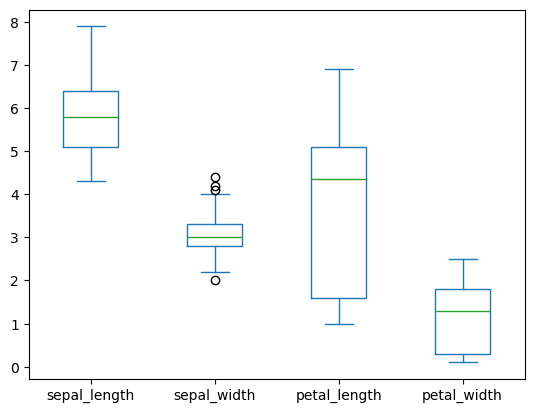

In [6]:

iris.plot( kind = "box")
plt.show()

In [7]:
iris.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

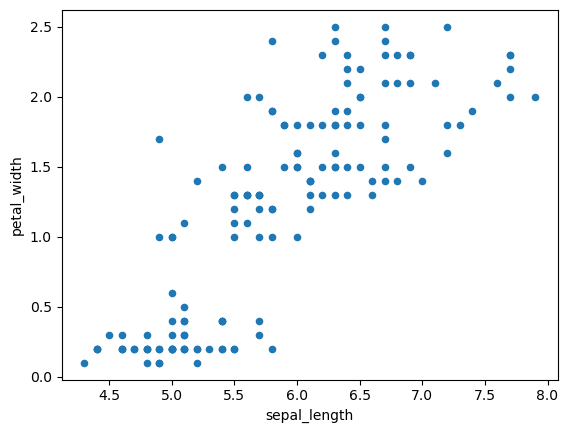

In [8]:
iris.plot(x = "sepal_length", y = "petal_width", kind = "scatter")
plt.show()

In [9]:
iris[["sepal_length", "petal_width"]].corr()

,sepal_length,petal_width
sepal_length,1.000000,0.817941
petal_width,0.817941,1.000000


In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
lm = LinearRegression()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = iris["sepal_length"].values
y = iris["petal_width"].values
X = X.reshape(-1, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 23)

In [15]:
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lm.predict(X_test)

In [17]:
y_pred

array([2.01097328, 2.23058801, 1.20571929, 0.32726038, 1.13251438,
       2.01097328, 1.13251438, 1.64494874, 0.91289965, 1.05930947,
       1.42533401, 0.4736702 , 2.1573831 , 0.69328493, 0.91289965,
       1.57174383, 1.64494874, 1.42533401, 2.59661255, 0.76648984,
       1.64494874, 0.4736702 , 0.69328493, 0.40046529, 1.86456346,
       0.69328493, 0.69328493, 1.49853892, 1.79135856, 1.05930947,
       0.54687511, 0.76648984, 0.91289965, 2.59661255, 0.62008002,
       0.91289965, 1.71815365, 0.62008002, 1.13251438, 1.57174383,
       2.01097328, 0.4736702 , 0.98610456, 0.32726038, 1.57174383])

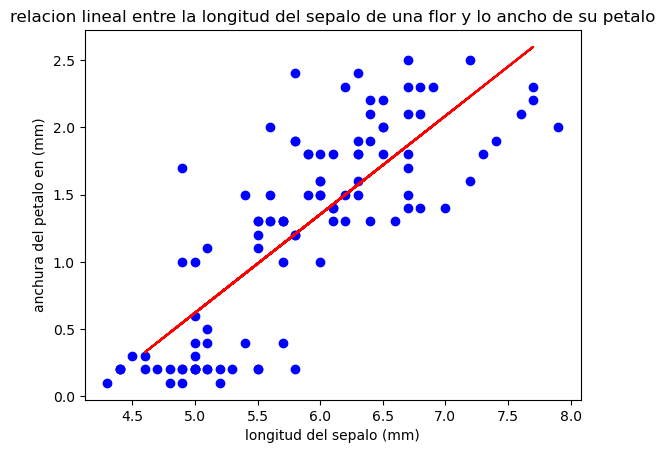

In [18]:
plt.scatter(X_train, y_train, color = "b")
plt.plot(X_test, y_pred, color = "r")
plt.xlabel("longitud del sepalo (mm)")
plt.ylabel("anchura del petalo en (mm)")
plt.title("relacion lineal entre la longitud del sepalo de una flor y lo ancho de su petalo")
plt.show()

In [19]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
iris[["sepal_width","petal_length"]].corr()

,sepal_width,petal_length
sepal_width,1.00000,-0.42844
petal_length,-0.42844,1.00000


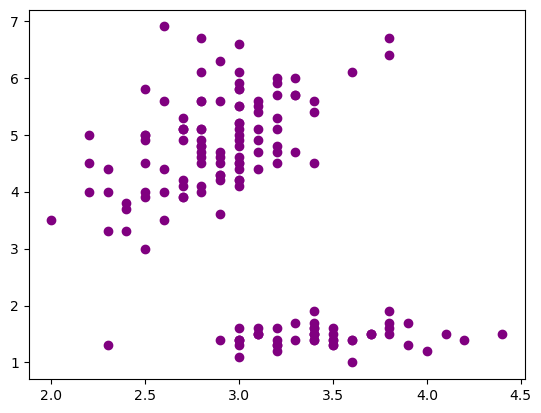

In [21]:
plt.scatter(iris["sepal_width"], y = iris["petal_length"], color = "purple")
plt.show()

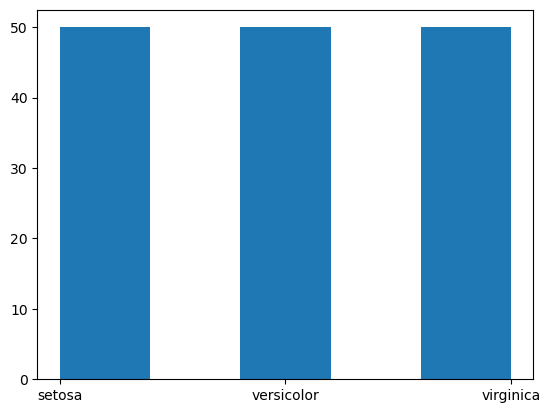

In [22]:
plt.hist(x = "species", data = iris, bins = 5)
plt.show()

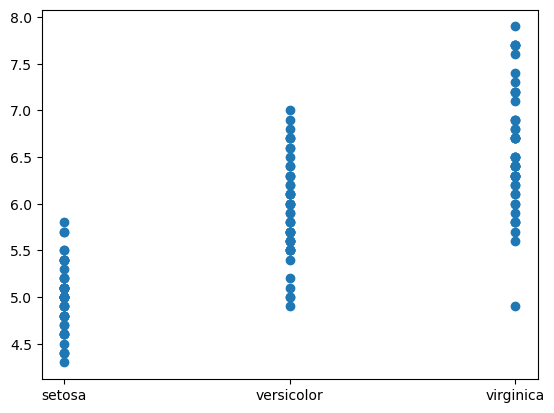

In [23]:
plt.scatter(x = "species", y = "sepal_length", data = iris)
plt.show()

In [24]:
iris_dummie = pd.get_dummies(iris, dtype = int )

In [25]:
iris_dummie.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [26]:
iris_dummie["species_setosa"].dtype

dtype('int32')

In [27]:
iris_dummie[["species_setosa", "sepal_length"]].corr()

,species_setosa,sepal_length
species_setosa,1.000000,-0.717416
sepal_length,-0.717416,1.000000


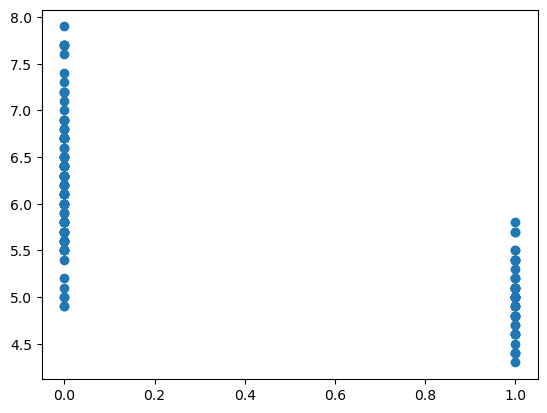

In [28]:
plt.scatter(x = "species_setosa", y  = "sepal_length", data = iris_dummie)
plt.show()

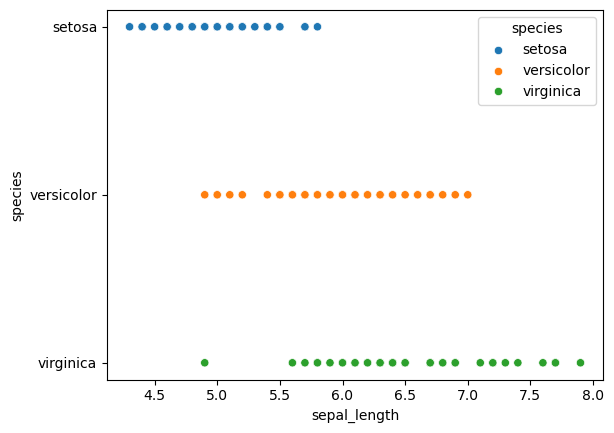

In [29]:
sns.scatterplot(x= "sepal_length", y = "species", hue = "species", data = iris)
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
X_knn = iris["sepal_length"].values
y_knn = iris["species"].values
X_knn = X_knn.reshape(-1,1)

In [32]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn ,y_knn, test_size = 0.2, random_state = 43)

In [33]:
import numpy as np

In [35]:
neighbors = np.arange(1, 20)
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_knn_train, y_knn_train)
    train_accuracies[neighbor] = knn.score(X_knn_train, y_knn_train)
    test_accuracies[neighbor] = knn.score(X_knn_test, y_knn_test)
print(neighbors, "\n", train_accuracies, "\n", test_accuracies )
    

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 
 {1: 0.725, 2: 0.75, 3: 0.75, 4: 0.75, 5: 0.7666666666666667, 6: 0.7666666666666667, 7: 0.75, 8: 0.75, 9: 0.75, 10: 0.75, 11: 0.75, 12: 0.75, 13: 0.75, 14: 0.75, 15: 0.75, 16: 0.725, 17: 0.725, 18: 0.725, 19: 0.75} 
 {1: 0.7333333333333333, 2: 0.7, 3: 0.7, 4: 0.7, 5: 0.7333333333333333, 6: 0.7333333333333333, 7: 0.7333333333333333, 8: 0.7333333333333333, 9: 0.7333333333333333, 10: 0.7333333333333333, 11: 0.7333333333333333, 12: 0.7333333333333333, 13: 0.7333333333333333, 14: 0.7333333333333333, 15: 0.7333333333333333, 16: 0.7, 17: 0.7, 18: 0.7, 19: 0.7333333333333333}


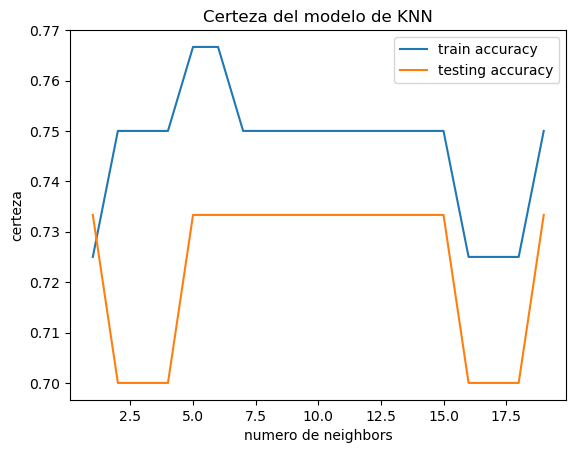

In [37]:
plt.title("Certeza del modelo de KNN")
plt.plot(neighbors, train_accuracies.values(), label = "train accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "testing accuracy")
plt.legend()
plt.xlabel("numero de neighbors")
plt.ylabel("certeza")
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [41]:
knn.fit(X_knn_train, y_knn_train)


KNeighborsClassifier()

In [43]:
y_pred_knn = knn.predict(X_knn_test)

In [45]:
y_pred_knn

array(['setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [47]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_knn_test, y_pred_knn)

array([[12,  1,  0],
       [ 1,  6,  1],
       [ 0,  5,  4]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_knn_test, y_pred_knn))

              precision    recall  f1-score   support

      setosa       0.92      0.92      0.92        13
  versicolor       0.50      0.75      0.60         8
   virginica       0.80      0.44      0.57         9

    accuracy                           0.73        30
   macro avg       0.74      0.71      0.70        30
weighted avg       0.77      0.73      0.73        30

